In [21]:
import pandas as pd


# Cargar el archivo CSV en un DataFrame
tumor_patients_recaida = pd.read_csv("recaida_gyn_norm.csv")


X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

CORRELACCIÓN

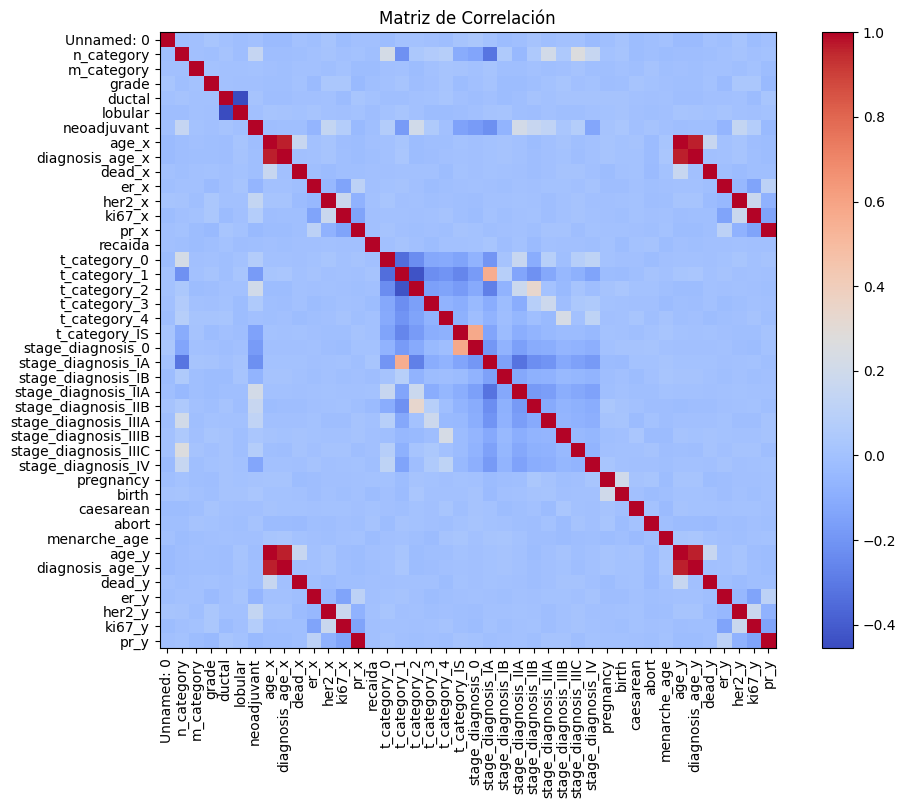

Columnas a eliminar:
{'ki67_y', 'pr_y', 'diagnosis_age_y', 'diagnosis_age_x', 'age_y', 'her2_y', 'dead_y', 'er_y'}
Columnas eliminada


In [22]:

import matplotlib.pyplot as plt

# Cargar tu dataset
# Asumo que ya tienes las variables X e y definidas


# Calcular la matriz de correlación
matriz_correlacion = tumor_patients_recaida.corr()

# Visualizar la matriz de correlación sin Seaborn
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.title("Matriz de Correlación")
plt.show()

# Eliminar las variables con correlación mayor al 80%
umbral_correlacion = 0.70
columnas_a_eliminar = set()

for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) > umbral_correlacion:
            columna = matriz_correlacion.columns[i]
            columnas_a_eliminar.add(columna)

print("Columnas a eliminar:")
print(columnas_a_eliminar)

# Eliminar las columnas con alta correlación
tumor_patients_recaida = tumor_patients_recaida.drop(columns=columnas_a_eliminar)

# Imprimir las columnas eliminadas
print("Columnas eliminada")

In [23]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación (Mejor Modelo Naive bayes):")
print(informe_clasificacion)



matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación (Mejor Modelo Naive bayes):
              precision    recall  f1-score   support

         0.0       0.06      0.01      0.02        77
         1.0       0.89      0.97      0.93       640

    accuracy                           0.87       717
   macro avg       0.48      0.49      0.48       717
weighted avg       0.80      0.87      0.83       717

Matriz de Confusión:
[[  1  76]
 [ 16 624]]


In [24]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



modelo_naive_bayes = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg", class_weight="balanced")
modelo_naive_bayes.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.11      0.45      0.18        77
         1.0       0.89      0.55      0.68       640

    accuracy                           0.54       717
   macro avg       0.50      0.50      0.43       717
weighted avg       0.81      0.54      0.63       717

Matriz de Confusión:
[[ 35  42]
 [287 353]]


In [27]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisiones
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_train, y_train)

# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)

# Crear y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)




Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.10      0.13      0.11        77
         1.0       0.89      0.86      0.87       640

    accuracy                           0.78       717
   macro avg       0.49      0.49      0.49       717
weighted avg       0.81      0.78      0.79       717

Matriz de Confusión:
[[ 10  67]
 [ 92 548]]


In [28]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier
import pandas as pd
from sklearn.metrics import classification_report

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)


# Evaluar el modelo en el conjunto de validación
y_pred = bbc.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)




Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.10      0.42      0.17        77
         1.0       0.89      0.57      0.70       640

    accuracy                           0.56       717
   macro avg       0.50      0.49      0.43       717
weighted avg       0.81      0.56      0.64       717

Matriz de Confusión:
[[ 32  45]
 [274 366]]


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


BALANCEADO

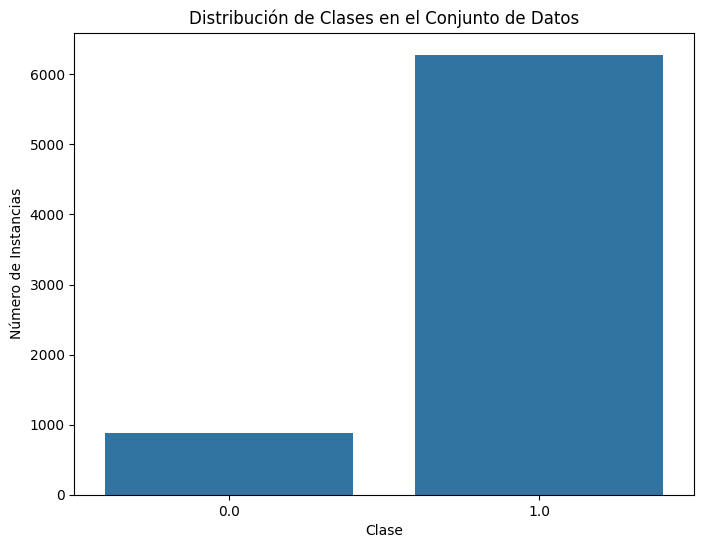

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de clases en el conjunto de datos
plt.figure(figsize=(8, 6))
sns.countplot(x='recaida', data=tumor_patients_recaida)
plt.title('Distribución de Clases en el Conjunto de Datos')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()

In [30]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from imblearn.combine import  SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



#os =  RandomOverSampler(random_state=42)
#X_res, y_res = os.fit_resample(X_train, y_train)

#smote = SMOTETomek(random_state=42)
#X_res, y_res = smote.fit_resample(X_train, y_train)

us = NearMiss()
X_res, y_res = us.fit_resample(X_train, y_train)

# Inicializar y entrenar el modelo de árbol de decisiones
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_res, y_res)


# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)

# Crear y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)

matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)


Matriz de Confusión:
[[ 46  31]
 [352 288]]
Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.12      0.60      0.19        77
         1.0       0.90      0.45      0.60       640

    accuracy                           0.47       717
   macro avg       0.51      0.52      0.40       717
weighted avg       0.82      0.47      0.56       717

Matriz de Confusión:
[[ 46  31]
 [352 288]]


In [31]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss


# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

us = NearMiss()
X_res, y_res = us.fit_resample(X_train, y_train)

modelo_naive_bayes = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg", class_weight="balanced")
modelo_naive_bayes.fit(X_res, y_res)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


# Imprimir el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("Informe de Clasificación Logistic regression:")
print(informe_clasificacion)


matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

Informe de Clasificación Logistic regression:
              precision    recall  f1-score   support

         0.0       0.10      0.47      0.17        77
         1.0       0.89      0.52      0.66       640

    accuracy                           0.51       717
   macro avg       0.50      0.49      0.41       717
weighted avg       0.81      0.51      0.60       717

Matriz de Confusión:
[[ 36  41]
 [308 332]]
